In [1]:
%matplotlib inline

:::{admonition} Download
:class: important render-all

This notebook can be downloaded as **{nb-download}`fundamentals_of_pynapple.ipynb`**. See the button at the top right to download as markdown or pdf.
:::


<div class="render-all">

# Learning the fundamentals of pynapple

## Learning objectives


- Instantiate the pynapple objects
- Make the pynapple objects interact
- Use numpy with pynapple
- Slicing pynapple objects
- Adding metadata to pynapple objects
- Learn the core functions of pynapple

The pynapple documentation can be found [here](https://pynapple.org).

The documentation for objects and method of the core of pynapple is [here](https://pynapple.org/api.html).


Let's start by importing the pynapple package and matplotlib to see if everything is correctly installed.
If an import fails, you can do `!pip install pynapple matplotlib` in a cell to fix it.

</div>

In [2]:
import pynapple as nap
import matplotlib.pyplot as plt
import numpy as np
import workshop_utils

/home/agent/workspace/rorse_ccn-software-sfn-2025_main/lib/python3.12/site-packages/nemos/_documentation_utils/plotting.py:39: UserWarning: plotting functions contained within `_documentation_utils` are intended for nemos's documentation. Feel free to use them, but they will probably not work as intended with other datasets / in other contexts.
  warnings.warn(


For this notebook we will work with fake data. The following cells generate a set of variables that we will use to create the different pynapple objects.

In [3]:
var1 = np.random.randn(100) # Variable 1
tsp1 = np.arange(100) # The timesteps of variable 1

var2 = np.random.randn(100, 3) # Variable 2
tsp2 = np.arange(0, 100, 1) # The timesteps of variable 2
col2 = ['pineapple', 'banana', 'tomato'] # The name of each columns of var2

var3 = np.random.randn(1000, 4, 5) # Variable 3
tsp3 = np.arange(0, 100, 0.1) # The timesteps of variable 3

random_times_1 = np.array([3.14, 37.0, 42.0])
random_times_2 = np.array([10, 25, 50, 70])
random_times_3 = np.sort(np.random.uniform(10, 80, 100))

starts_1 = np.array([10000, 60000, 90000]) # starts of an epoch in `ms`
ends_1 = np.array([20000, 80000, 95000]) # ends in `ms`

## Instantiate pynapple objects 

This is a lot of variables to carry around. pynapple can help reduce the size of the workspace. Here we will instantiate all the different pynapple objects with the variables created above.

Let's start with the simple ones.

<div class="render-all">

**Question:** Can you instantiate the right pynapple objects for `var1`, `var2` and `var3`? Objects should be named respectively `tsd1`, `tsd2` and `tsd3`. Don't forget the column name for `var2`.

</div>

In [4]:
tsd1 = nap.Tsd(t=tsp1, d=var1)
tsd2 = nap.TsdFrame(t=tsp2, d=var2, columns = col2)
tsd3 = nap.TsdTensor(t=tsp3, d=var3)

<div class="render-all">

**Question:** Can you print `tsd1`?

</div>

In [5]:
print(tsd1)

Time (s)
----------  -----------
0.0          0.160469
1.0         -0.706723
2.0         -0.054591
3.0         -0.355368
4.0          2.95019
5.0         -2.90054
6.0         -0.0959175
...
93.0         0.00356826
94.0         0.89547
95.0         0.972098
96.0        -0.827093
97.0         0.0238298
98.0        -0.985306
99.0         1.34717
dtype: float64, shape: (100,)


<div class="render-all">

**Question:** Can you print `tsd2`?

</div>

In [6]:
print(tsd2)

Time (s)      pineapple       banana      tomato
----------  -----------  -----------  ----------
0.0           0.368834   -2.35755     -1.54051
1.0          -0.235243    0.974776     1.33573
2.0          -0.564759   -0.362716    -1.63992
3.0          -0.209212   -0.00326554  -0.535518
4.0           0.434599   -1.58148     -1.13251
5.0          -0.990773    1.3833       0.0257729
6.0          -0.799113   -0.903168     0.458069
...
93.0          0.0769912  -1.37349     -0.543324
94.0          1.91517    -0.553143     2.74032
95.0          0.333111    0.332221    -1.0007
96.0         -0.627296    0.60287     -0.76471
97.0          0.285677    2.11861      0.357007
98.0          1.15187     2.82259     -1.47441
99.0          1.7013      1.17669     -0.349156
dtype: float64, shape: (100, 3)


<div class="render-all">

**Question:** Can you print `tsd3`?

</div>

In [7]:
print(tsd3)

Time (s)
----------  -------------------------------
0.0         [[0.778185 ... 0.50695 ] ...]
0.1         [[0.884643 ... 1.036657] ...]
0.2         [[0.880755 ... 0.660158] ...]
0.3         [[2.177612 ... 0.537348] ...]
0.4         [[ 1.3303   ... -0.263166] ...]
0.5         [[2.05329  ... 1.805468] ...]
0.6         [[-0.004823 ... -0.519887] ...]
...
99.3        [[-0.539315 ... -1.16312 ] ...]
99.4        [[ 0.097741 ... -1.233353] ...]
99.5        [[ 0.091302 ... -0.731372] ...]
99.6        [[-0.954082 ... -0.107949] ...]
99.7        [[0.212003 ... 1.247529] ...]
99.8        [[ 0.247837 ... -1.187591] ...]
99.9        [[-1.394929 ...  1.938041] ...]
dtype: float64, shape: (1000, 4, 5)


<div class="render-all">

**Question:** Can you create an `IntervalSet` called `ep` out of `starts_1` and `ends_1` and print it? Be careful, times given above are in `ms`.

</div>

In [8]:
ep = nap.IntervalSet(start=starts_1, end=ends_1, time_units='ms')
print(ep)

  index    start    end
      0       10     20
      1       60     80
      2       90     95
shape: (3, 2), time unit: sec.


<div class="render-all">

The experiment generated a set of timestamps from 3 different channels.

**Question:** Can you instantiate the corresponding pynapple object (`ts1`, `ts2`, `ts3`) for each one of them?

</div>

In [9]:
ts1 = nap.Ts(t=random_times_1)
ts2 = nap.Ts(t=random_times_2)
ts3 = nap.Ts(t=random_times_3)

<div class="render-all">

This is a lot of timestamps to carry around as well.

**Question:** Can you instantiate the right pynapple object (call it `tsgroup`) to group them together?

</div>

In [10]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3})

<div class="render-all">

**Question:** ... and print it?

</div>

In [11]:
print(tsgroup)

  Index     rate
-------  -------
      0  0.03921
      1  0.05227
      2  1.30686


## Interaction between pynapple objects 

We reduced 12 variables in our workspace to 5 using pynapple. Now we can see how the objects interact.

<div class="render-all">

**Question:** Can you print the `time_support` of `tsgroup`?

</div>

In [12]:
print(tsgroup.time_support)

  index    start      end
      0     3.14  79.6593
shape: (1, 2), time unit: sec.


The experiment ran from 0 to 100 seconds and as you can see, the `TsGroup` object shows the rate. But the rate is not accurate as it was computed over the default `time_support`.

<div class="render-all">

**Question:** can you recreate the `tsgroup` object passing the right `time_support` during initialisation?

</div>

In [13]:
tsgroup = nap.TsGroup({0:ts1, 1:tsd2, 2:ts3}, time_support = nap.IntervalSet(0, 100))

<div class="render-all">

**Question:** Can you print the `time_support` and `rate` to see how they changed?

</div>

In [14]:
print(tsgroup.time_support)
print(tsgroup.rate)

  index    start    end
      0        0    100
shape: (1, 2), time unit: sec.
0    0.03
1    1.00
2    1.00
Name: rate, dtype: float64


<div class="render-all">

Now you realized the variable `tsd1` has some noise. The good signal is between 10 and 30 seconds and  50 and 100.

**Question:** Can you create an `IntervalSet` object called `ep_signal` and use it to restrict the variable `tsd1`?

</div>

In [15]:
ep_signal = nap.IntervalSet(start=[10, 50], end=[30, 100])

tsd1 = tsd1.restrict(ep_signal)

<div class="render-all">
You can print `tsd1` to check that the timestamps are in fact within `ep`.
You can also check the `time_support` of `tsd1` to see that it has been updated.
</div>

In [16]:
print(tsd1)
print(tsd1.time_support)

Time (s)
----------  -----------
10.0        -1.11438
11.0         2.03516
12.0        -1.76639
13.0         0.610948
14.0        -1.37578
15.0        -1.48208
16.0        -1.06138
...
93.0         0.00356826
94.0         0.89547
95.0         0.972098
96.0        -0.827093
97.0         0.0238298
98.0        -0.985306
99.0         1.34717
dtype: float64, shape: (71,)
  index    start    end
      0       10     30
      1       50    100
shape: (2, 2), time unit: sec.


In [17]:
ep_tmp = nap.IntervalSet(np.sort(np.random.uniform(0, 100, 20)))
print(ep_tmp)

  index     start       end
      0   3.61095   5.71302
      1   6.29962   8.13454
      2   8.9607   22.3273
      3  32.2575   36.8183
      4  50.8112   51.2613
      5  58.4164   58.5709
      6  59.5274   63.152
      7  67.8041   77.0662
      8  79.4862   83.3638
      9  88.1147   98.9837
shape: (10, 2), time unit: sec.


<div class="render-all">

**Question:** Can you do the intersection of `ep_signal` and `ep_tmp`?
</div>

In [18]:
print(ep_signal.intersect(ep_tmp))

  index    start      end
      0  10       22.3273
      1  50.8112  51.2613
      2  58.4164  58.5709
      3  59.5274  63.152
      4  67.8041  77.0662
      5  79.4862  83.3638
      6  88.1147  98.9837
shape: (7, 2), time unit: sec.


<div class="render-all">
You can visualize IntervalSet using the function `workshop_utils.visualize_intervals` we provide.
</div>

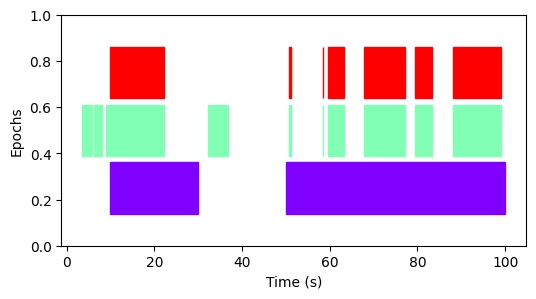

In [19]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.intersect(ep_tmp)])

<div class="render-all">

**Question:** Can you do the union of `ep_signal` and `ep_tmp`?
</div>

In [20]:
print(ep_signal.union(ep_tmp))

  index     start        end
      0   3.61095    5.71302
      1   6.29962    8.13454
      2   8.9607    30
      3  32.2575    36.8183
      4  50        100
shape: (5, 2), time unit: sec.


<div class="render-all">

**Question:** ... and visualize it?
</div>

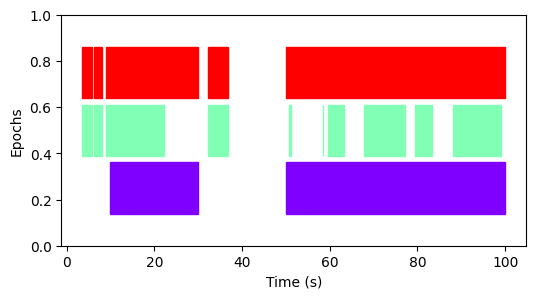

In [21]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.union(ep_tmp)])

<div class="render-all">

**Question:** Can you do the difference of `ep_signal` and `ep_tmp`?
</div>

In [22]:
print(ep_signal.set_diff(ep_tmp))

  index    start       end
      0  22.3273   30
      1  50        50.8112
      2  51.2613   58.4164
      3  58.5709   59.5274
      4  63.152    67.8041
      5  77.0662   79.4862
      6  83.3638   88.1147
      7  98.9837  100
shape: (8, 2), time unit: sec.


<div class="render-all">

**Question:** ... and visualize it?
</div>

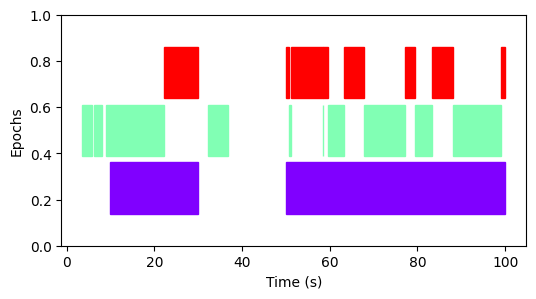

In [23]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.set_diff(ep_tmp)])

## Numpy & pynapple

<div class="render-all">

Pynapple objects behaves very similarly like numpy array. They can be sliced with the following syntax :

  `tsd[0:10] # First 10 elements`

Arithmetical operations are available as well :

  `tsd = tsd + 1`

Finally numpy functions works directly. Let's imagine `tsd3` is a movie with frame size (4,5).

**Question:** Can you compute the average frame along the time axis using `np.mean` and print the result?

</div>

In [24]:
print(np.mean(tsd3, 0))

[[ 0.01316477 -0.02204738 -0.05258987 -0.0315323   0.00746789]
 [-0.00772068  0.00759804  0.03102658 -0.02636697 -0.02729113]
 [-0.05003322 -0.03353408  0.00450756 -0.00504027 -0.01343957]
 [ 0.03939143  0.0343191  -0.02708205 -0.03182238 -0.01717789]]


<div class="render-all">

**Question:**: can you compute the average of `tsd2` for each timestamps and print it?
</div>

In [25]:
print(np.mean(tsd2, 1))

Time (s)
----------  ---------
0.0         -1.17641
1.0          0.691753
2.0         -0.855797
3.0         -0.249332
4.0         -0.759797
5.0          0.139432
6.0         -0.414737
...
93.0        -0.613275
94.0         1.36745
95.0        -0.111789
96.0        -0.263045
97.0         0.92043
98.0         0.833352
99.0         0.842947
dtype: float64, shape: (100,)


Notice how the output in the second case is still a pynapple object.
In most cases, applying a numpy function will return a pynapple object if the time index is preserved.

## Slicing pynapple objects 

Multiple methods exists to slice pynapple object. This parts reviews them.

`IntervalSet` also behaves like numpy array.

<div class="render-all">

**Question:** Can you extract the first and last epoch of `ep` in a new `IntervalSet`?
</div>

In [26]:
print(ep[[0,2]])

  index    start    end
      0       10     20
      1       90     95
shape: (2, 2), time unit: sec.


<div class="render-all">

Sometimes you want to get a data point as close as possible in time to another timestamps.

**Question:** Using the `get` method, can you get the data point from `tsd3` as close as possible to the time 50.1 seconds?

</div>

In [27]:
print(tsd3.get(50.1))

[[-0.79350592 -1.19608709  0.33560085 -1.808772    0.29553625]
 [-0.09799424 -1.19398624 -0.39914407  0.01177152 -0.6966451 ]
 [-0.19375424 -0.25276621  0.42460116 -0.28583667 -0.52376499]
 [-1.01115903 -1.62403282  0.28573719 -1.34158754  0.03659696]]


## Metadata

<div class="render-all">

Metadata are ubiquitous in neuroscience. They can be added to 3 pynapple objects :

- `TsGroup` : to label neurons in electrophysiology
- `IntervalSet` : to label intervals
- `TsdFrame` : to label neurons in calcium imaging


**Question:** Can you run the following command `tsgroup['planet'] = ['mars', 'venus', 'saturn']`
</div>

In [28]:
tsgroup['planet'] = ['mars', 'venus', 'saturn']

<div class="render-all">

**Question:** ... and print it?
</div>

In [29]:
print(tsgroup)

  Index    rate  planet
-------  ------  --------
      0    0.03  mars
      1    1     venus
      2    1     saturn


<div class="render-all">

The object `ep` has 3 epochs labelled `['left', 'right', 'left']`. 

**Question:** Can you add them as a metadata column called `direction`?

</div>

In [30]:
ep['direction'] = ['left', 'right', 'left']
print(ep)

  index    start    end  direction
      0       10     20  left
      1       60     80  right
      2       90     95  left
shape: (3, 2), time unit: sec.


<div class="render-all">

The object `tsd2` has 3 columns. Each column correspond to the rgb colors `[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]`. 

**Question:** Can you add them as metadata of `tsd2`?
</div>

In [31]:
tsd2['colors'] = [(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]
print(tsd2)

Time (s)    pineapple             banana                  tomato
----------  --------------------  ----------------------  --------------------
0.0         0.3688336586489103    -2.3575480843354493     -1.5405133867485932
1.0         -0.23524330038874816  0.9747761799074546      1.3357272802518558
2.0         -0.5647594854544975   -0.36271586459444555    -1.6399170178018236
3.0         -0.20921234339192588  -0.0032655431798066696  -0.5355180892277139
4.0         0.43459923207471296   -1.5814810806485549     -1.1325099732832218
5.0         -0.9907733822133594   1.383296148013105       0.025772902840276148
6.0         -0.7991128468172298   -0.9031681233433416     0.4580686906012593
...
93.0        0.07699123162896598   -1.3734922488144259     -0.5433240751285036
94.0        1.9151660801535983    -0.5531434841093958     2.7403239630391063
95.0        0.33311087242690285   0.33222126500302707     -1.000699045750833
96.0        -0.6272959144614034   0.6028696022915108      -0.76470967609312

<div class="render-all">

You can also add metadata at initialization as a dictionnary using the keyword argument `metadata` : 
</div>

In [32]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3}, metadata={'planet':['mars','venus', 'saturn']})

print(tsgroup)

  Index     rate  planet
-------  -------  --------
      0  0.03921  mars
      1  0.05227  venus
      2  1.30686  saturn


<div class="render-all">

Metadata are accessible either as attributes (i.e. `tsgroup.planet`) or as dictionnary-like keys (i.e. `ep['direction']`).

They can be used to slice objects. 

**Question:** Can you select only the elements of `tsgroup` with rate below 1Hz?
</div>

In [33]:
print(tsgroup[tsgroup.rate<1.0])

print(tsgroup[tsgroup['rate']<1.0])

print(tsgroup.getby_threshold("rate", 1, "<"))

  Index     rate  planet
-------  -------  --------
      0  0.03921  mars
      1  0.05227  venus
  Index     rate  planet
-------  -------  --------
      0  0.03921  mars
      1  0.05227  venus
  Index     rate  planet
-------  -------  --------
      0  0.03921  mars
      1  0.05227  venus


<div class="render-all">

**Question:** Can you select the intervals in `ep` labelled as `'left'`?
</div>

In [34]:
print(ep[ep.direction=='left'])

  index    start    end  direction
      0       10     20  left
      1       90     95  left
shape: (2, 2), time unit: sec.


### Special case of slicing : `TsdFrame`

In [35]:
tsdframe = nap.TsdFrame(t=np.arange(4), d=np.random.randn(4,3),
  columns = [12, 0, 1], metadata={'alpha':[2,1,0]})

print(tsdframe)

Time (s)    12                   0                     1
----------  -------------------  --------------------  --------------------
0.0         0.24779319172318856  -0.5485529583985823   -2.193944552162906
1.0         -0.6288051395944846  0.6359800301779037    -0.19272780531834466
2.0         2.3833987939648686   -0.12175190492965235  2.8037193821602844
3.0         -0.615085161258425   1.018890851339378     0.3705303782153755
Metadata
alpha       2                    1                     0
dtype: float64, shape: (4, 3)


<div class="render-all">

**Question:** What happen when you do `tsdframe[0]` vs `tsdframe[:,0]` vs `tsdframe[[12,1]]`
</div>

In [36]:
print(tsdframe[0])

[ 0.24779319 -0.54855296 -2.19394455]


<div class="render-all">

**Question:** What happen when you do `tsdframe.loc[0]` and `tsdframe.loc[[0,1]]`
</div>

In [37]:
print(tsdframe.loc[0])
print(tsdframe.loc[[0,1]])

Time (s)
----------  ---------
0           -0.548553
1            0.63598
2           -0.121752
3            1.01889
dtype: float64, shape: (4,)
Time (s)    0                     1
----------  --------------------  --------------------
0.0         -0.5485529583985823   -2.193944552162906
1.0         0.6359800301779037    -0.19272780531834466
2.0         -0.12175190492965235  2.8037193821602844
3.0         1.018890851339378     0.3705303782153755
Metadata
alpha       1                     0
dtype: float64, shape: (4, 2)


<div class="render-all">

**Question:** What happen when you do `tsdframe[:,tsdframe.alpha==2]`

</div>

In [38]:
print(tsdframe[:,tsdframe.alpha==2])

Time (s)    12
----------  -------------------
0.0         0.24779319172318856
1.0         -0.6288051395944846
2.0         2.3833987939648686
3.0         -0.615085161258425
Metadata
alpha       2
dtype: float64, shape: (4, 1)


## Core functions of pynapple 

<div class="render-all">

This part focuses on the most important core functions of pynapple.

**Question:** Using the `count` function, can you count the number of events within 1 second bins for `tsgroup` over the `ep_signal` intervals?
</div>

In [39]:
count = tsgroup.count(1, ep_signal)
print(count)

Time (s)    0     1      2
----------  ----  -----  ------
10.5        0     1      3
11.5        0     0      2
12.5        0     0      3
13.5        0     0      2
14.5        0     0      1
15.5        0     0      3
16.5        0     0      2
...
93.5        0     0      0
94.5        0     0      0
95.5        0     0      0
96.5        0     0      0
97.5        0     0      0
98.5        0     0      0
99.5        0     0      0
Metadata
planet      mars  venus  saturn
dtype: int64, shape: (70, 3)


Pynapple works directly with matplotlib. Passing a time series object to `plt.plot` will display the figure with the correct time axis.

**Question:** In two subplots, can you show the count and events over time?

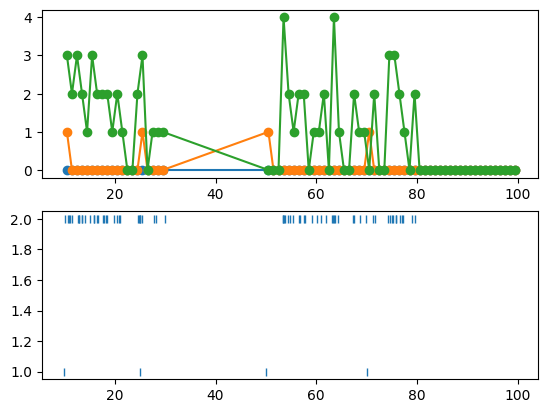

In [40]:
plt.figure()
ax = plt.subplot(211)
plt.plot(count, 'o-')
plt.subplot(212, sharex=ax)
plt.plot(tsgroup.restrict(ep_signal).to_tsd(), '|')

<div class="render-all">

From a set of timestamps, you want to assign them a set of values with the closest point in time of another time series.

**Question:** Using the function `value_from`, can you assign values to `ts2` from the `tsd1` time series and call the output `new_tsd`?

</div>

In [41]:
new_tsd = ts2.value_from(tsd1)

<div class="render-all">

**Question:** Can you plot together `tsd1`, `ts2` and `new_tsd`?

</div>

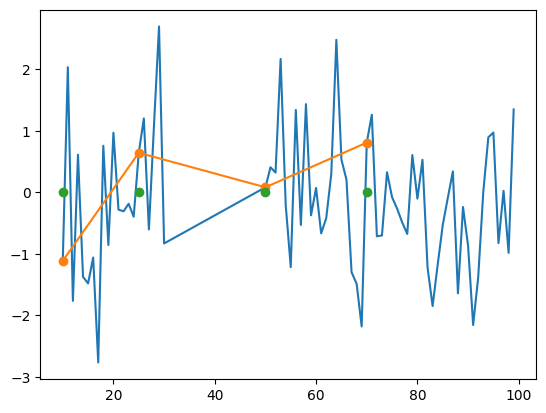

In [42]:
plt.figure()
plt.plot(tsd1)
plt.plot(new_tsd, 'o-')
plt.plot(ts2.fillna(0), 'o')

<div class="render-all">

One important aspect of data analysis is to bring data to the same size. Pynapple provides the `bin_average` function to downsample data.

**Question:** Can you downsample `tsd2` to one time point every 5 seconds?

</div>

In [43]:
new_tsd2 = tsd2.bin_average(5.0)

<div class="render-all">

**Question:** Can you plot the `tomato` column from `tsd2` as well as the downsampled version?

</div>

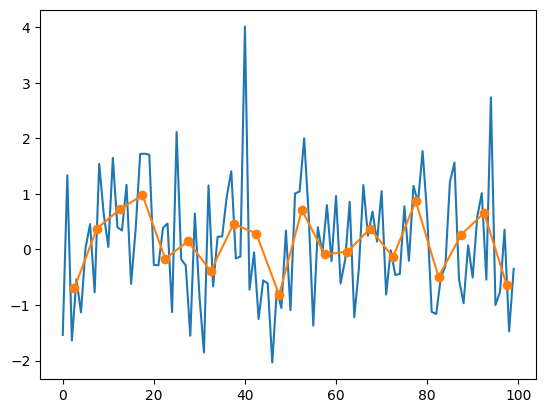

In [44]:
plt.figure()
plt.plot(tsd2['tomato'])
plt.plot(new_tsd2['tomato'], 'o-')

<div class="render-all">

For `tsd1`, you want to find all the epochs for which the value is above 0.0. Pynapple provides the function `threshold` to get 1 dimensional time series above or below a certain value.

**Question**: Can you print the epochs for which `tsd1` is above 0.0?
</div>

In [45]:
ep_above = tsd1.threshold(0.0).time_support

print(ep_above)

index    start    end
0        10.5     11.5
1        12.5     13.5
2        17.5     18.5
3        19.5     20.5
4        24.5     26.5
5        27.5     29.5
6        50.0     53.5
...      ...      ...
12       73.5     74.5
13       78.5     79.5
14       80.5     81.5
15       86.5     87.5
16       92.5     95.5
17       96.5     97.5
18       98.5     99.0
shape: (19, 2), time unit: sec.


<div class="render-all">

**Question**: can you plot `tsd1` as well as the epochs for which `tsd1` is above 0.0?
</div>

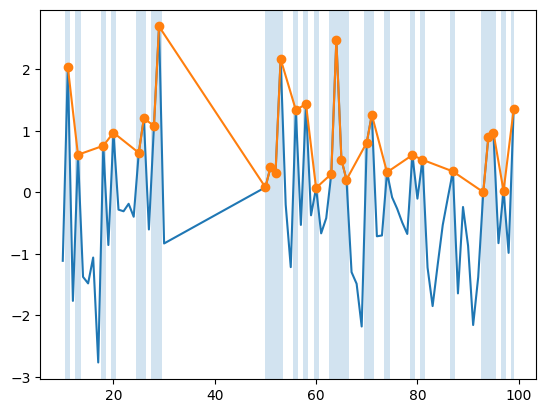

In [46]:
plt.figure()
plt.plot(tsd1)
plt.plot(tsd1.threshold(0.0), 'o-')
[plt.axvspan(s, e, alpha=0.2) for s,e in ep_above.values]

## First high level function : `compute_tuning_curves`

<div class="render-all">

Pynapple provides functions for standard analysis in systems neuroscience. The first function we will try is `compute_tuning_curves` that calculate the response of a cell to a particular feature. 

A good practice when using a function for the first time is to check the docstrings to learn how to pass the argument.

**Question**: can you examine the docstring of `nap.compute_tuning_curves`?

</div>

In [47]:
print(nap.compute_tuning_curves.__doc__)


    Computes n-dimensional tuning curves relative to n features.

    Parameters
    ----------
    data : TsGroup, TsdFrame, Ts, Tsd
        The data for which the tuning curves will be computed. This usually corresponds to the activity of the
        neurons, either as spike times (TsGroup or Ts) or continuous values (TsdFrame or Tsd).
    features : Tsd, TsdFrame
        The features (i.e. one column per feature). This usually corresponds to behavioral variables such as
        position, head direction, speed, etc.
    bins : sequence or int
        The bin specification:

        * A sequence of arrays describing the monotonically increasing bin
          edges along each dimension.
        * The number of bins for each dimension (nx, ny, ... =bins)
        * The number of bins for all dimensions (nx=ny=...=bins).
    range : sequence, optional
        A sequence of entries per feature, each an optional (lower, upper) tuple giving
        the outer bin edges to be used if the edge

<div class="render-all">

**Question**: Can you compute the response (i.e. firing rate) of the units in `tsgroup` as function of the feature `tsd1` using the function `nap.compute_tuning_curves`?

</div>

In [48]:
tc = nap.compute_tuning_curves(tsgroup, tsd1, bins=5, feature_names=["feat1"])
tc

<xarray.DataArray (unit: 3, feat1: 5)> Size: 120B
array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.04761905, 0.04      , 0.125     , 0.        ],
       [0.6       , 0.61904762, 0.92      , 1.4375    , 1.75      ]])
Coordinates:
  * unit     (unit) int64 24B 0 1 2
  * feat1    (feat1) float64 40B -2.222 -1.129 -0.03541 1.058 2.151
Attributes:
    occupancy:  [ 5. 21. 25. 16.  4.]
    bin_edges:  [array([-2.76833082, -1.67516101, -0.5819912 ,  0.51117861,  ...
    fs:         1.0

<div class="render-all">

The output is an [xarray](https://docs.xarray.dev/en/stable/) object. It is a wrapper of numpy array with extra attributes. It allows to give coordinates to each dimensions as well as attaching attributes. We can make the output look better by labelling the feature we used.

The coordinates can be accessed with the `coords` attribute. The feature position (i.e. center of the bin) can be accessed with the attribute.

**Question**: Can you print the underlying the units number, bin center and bin edges of the tuning curve xarray object?

</div>

In [49]:
print(tc.unit.values)
print(tc.feat1.values)
print(tc.occupancy)
print(tc.bin_edges)
print(tc.fs)

[0 1 2]
[-2.22174591 -1.1285761  -0.0354063   1.05776351  2.15093332]
[ 5. 21. 25. 16.  4.]
[array([-2.76833082, -1.67516101, -0.5819912 ,  0.51117861,  1.60434842,
        2.69751822])]
1.0


<div class="render-all">

**Question**: Can you plot the tuning curves for all units?

</div>

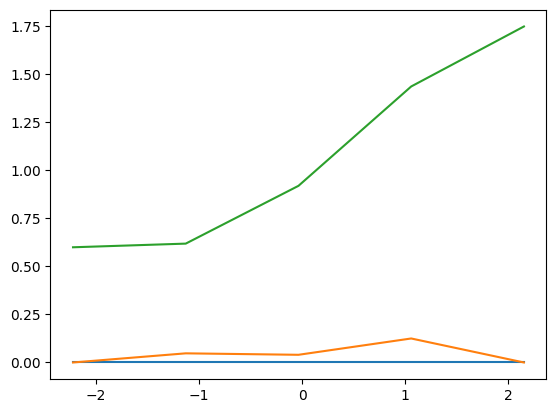

In [50]:
# tc.plot()
# tc.plot(row="unit")
# tc.plot(col="unit")
# tc[1].plot()
# plt.plot(tc[1].feat1, tc[1].values)
plt.plot(tc.feat1, tc.values.T)


## Important

<div class="render-all">

**Question:** Does this work?
If not, please ask a TA.

</div>

In [51]:
import workshop_utils
path = workshop_utils.fetch_data("Mouse32-140822.nwb")
print(path)

  0%|                                              | 0.00/36.6M [00:00<?, ?B/s]

  1%|▍                                     | 376k/36.6M [00:00<00:09, 3.71MB/s]

 17%|██████▍                              | 6.32M/36.6M [00:00<00:00, 36.3MB/s]

 27%|██████████                           | 9.98M/36.6M [00:00<00:00, 28.0MB/s]

 40%|██████████████▊                      | 14.7M/36.6M [00:00<00:00, 26.5MB/s]

 57%|█████████████████████▏               | 21.0M/36.6M [00:00<00:00, 35.3MB/s]

 70%|█████████████████████████▉           | 25.7M/36.6M [00:00<00:00, 38.4MB/s]

 92%|█████████████████████████████████▊   | 33.5M/36.6M [00:00<00:00, 49.6MB/s]

  0%|                                              | 0.00/36.6M [00:00<?, ?B/s]

100%|█████████████████████████████████████| 36.6M/36.6M [00:00<00:00, 75.1GB/s]

/home/agent/workspace/rorse_ccn-software-sfn-2025_main/lib/python3.12/data/Mouse32-140822.nwb
